
<table>
<tr>
<td width=15%><img src="./img/UGA.png"></img></td>
<td><center><h1>Introduction to Python for Data Sciences</h1></center></td>
<td width=15%><a href="http://www.iutzeler.org" style="font-size: 16px; font-weight: bold">Franck Iutzeler</a><br/> Fall. 2018 </td>
</tr>
</table>


<br/><br/><div id="top"></div>

<center><a style="font-size: 40pt; font-weight: bold">Chap. 3 - Data Handling with Pandas </a></center>

<br/>

# ``3. Fancy Visualization with Seaborn``

---

<a href="#style"><b>Package check and Styling</b></a><br/><br/><b>Outline</b><br/><br/>
&nbsp;&nbsp;&nbsp; a) <a href="#visuSeaborne"> Advanced visualization with Seaborn  </a><br/>

## <a id="visuSeaborne"> a) Advanced visualization with Seaborn  </a> 

<p style="text-align: right; font-size: 10px;"><a href="#top">Go to top</a></p>



[Seaborn](https://seaborn.pydata.org/) is a package that produces somewhat nicer and more data oriented plots than Matplotlib. It also gives a fresher look to matlotlib plots.

In [2]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

%matplotlib inline

In [3]:
# Create some data
rng = np.random.RandomState(0)
x = np.linspace(0, 10, 500)
y = np.cumsum(rng.randn(500, 3), 0)

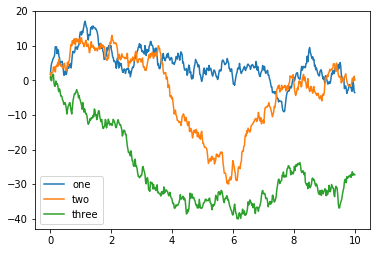

In [4]:
plt.plot(x, y)
plt.legend('one two three'.split(' '));

Let us import seaborn and change the matplotlib style with <tt>sns.set()</tt>

In [5]:
import seaborn as sns
sns.set()

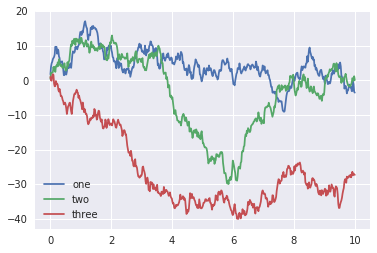

In [6]:
# Same command but now seaborn is set
plt.plot(x, y)
plt.legend('one two three'.split(' '));

### Plotting Distributions

Apart from the standard histograms <tt>plt.hist</tt>, Seaborn provides smoothed density plots based on data using <tt>sns.kdeplot</tt> or <tt>sns.distplot</tt>. 

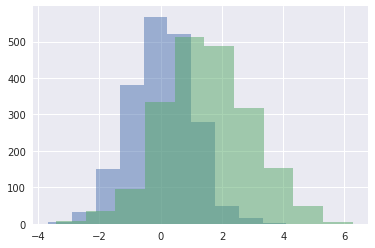

In [22]:
data = np.random.multivariate_normal([0, 1.5], [[1, 0.2], [0.2, 2]], size=2000)
data = pd.DataFrame(data, columns=['x', 'y'])

for col in 'xy':
    plt.hist(data[col], alpha=0.5) # alpha=0.5 provides semi-transparent plots

<tt>kdeplot</tt> provides density plots from an array or series (<tt>shade=True</tt> provide filled ones).

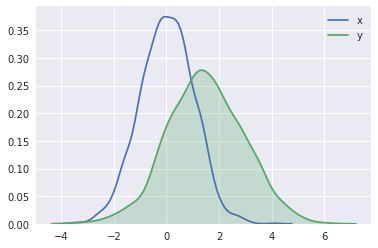

In [23]:
sns.kdeplot(data['x'])
sns.kdeplot(data['y'],shade=True)

<tt>distplot</tt> is a mix of the two previous ones.

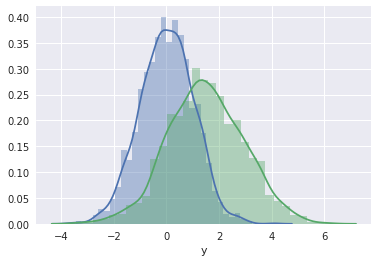

In [24]:
sns.distplot(data['x'])
sns.distplot(data['y'])

Two-dimensional dataset may be represented by level sets with <tt>kdeplot</tt>.

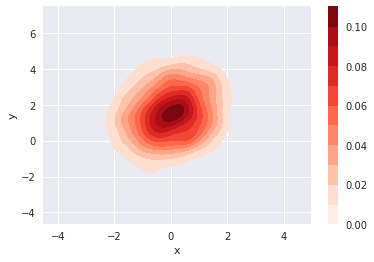

In [32]:
sns.kdeplot(data['x'],data['y'], shade=True, shade_lowest=False , cmap="Reds", cbar=True)

Joint distribution and the marginal distributions can be displayed together using <tt>jointplot</tt>

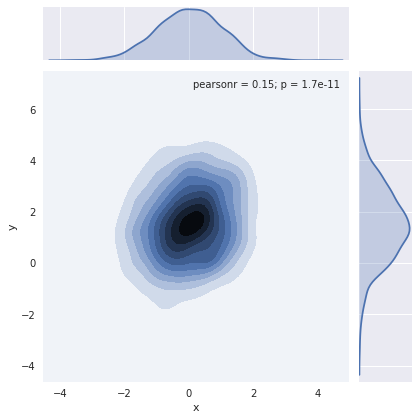

In [33]:
sns.jointplot("x", "y", data, kind='kde');

### Exploring features correlations and interest to classification

Seaborn provides an efficient tool for quickly exploring different features and classification with <tt>pairplot</tt>.

In [34]:
import pandas as pd
import numpy as np

iris = pd.read_csv('data/iris.csv')
print(iris.shape)
iris.head()

(150, 5)


,sepal_length,sepal_width,petal_length,petal_width,species
0,5.1,3.5,1.4,0.2,setosa
1,4.9,3.0,1.4,0.2,setosa
2,4.7,3.2,1.3,0.2,setosa
3,4.6,3.1,1.5,0.2,setosa
4,5.0,3.6,1.4,0.2,setosa


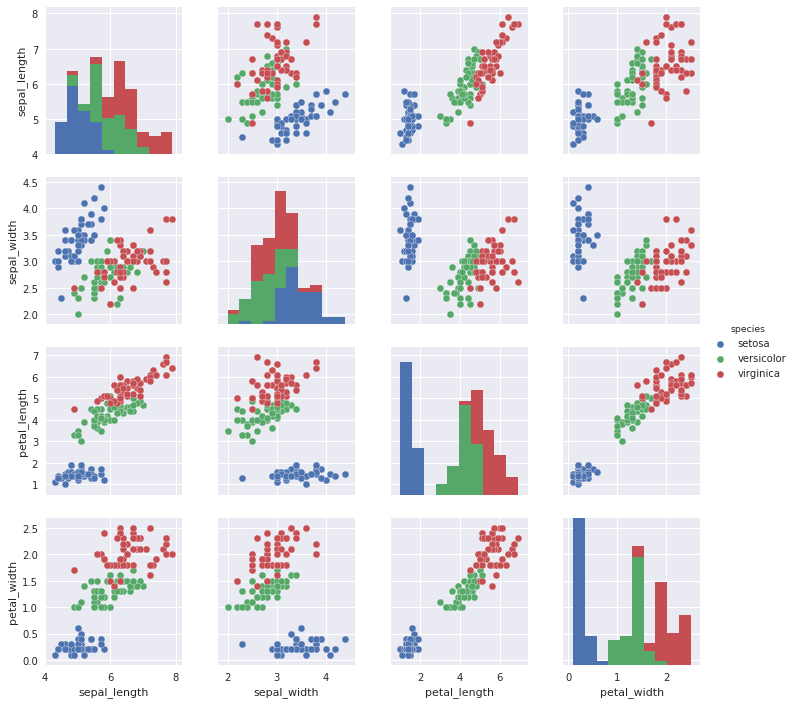

In [37]:
sns.pairplot(iris, hue='species')

<tt>factorplot</tt> also provides error plots.

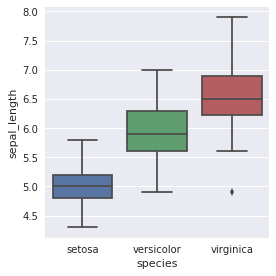

In [47]:
sns.factorplot( x = "species" ,  y="sepal_length"  , data=iris ,   kind="box")

### Melting dataframes

For displaying classification data, it is sometimes interesting to **melt** dataframes, that is separating 
* **id:** the classes typically, things that are not numeric, that have to be kept in place (in our case with *iris*, the species)
* **values:** the *columns* corresponding to values (in our case with *iris*, the sepal_length, sepal_width, etc.)

The command <tt>pd.melt</tt> return a dataframe with as columns: the id, the variable (former column) name, and associated value.

In [50]:
irisS = pd.melt(iris,id_vars="species",value_vars=["sepal_length","sepal_width","petal_length","petal_width"])
irisS.head()

,species,variable,value
0,setosa,sepal_length,5.1
1,setosa,sepal_length,4.9
2,setosa,sepal_length,4.7
3,setosa,sepal_length,4.6
4,setosa,sepal_length,5.0


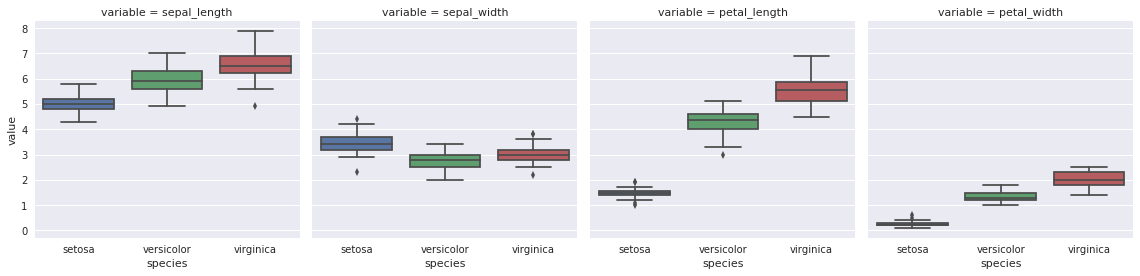

In [57]:
sns.factorplot( x=  "species" , y = "value" , col="variable"  , data=irisS , kind="box")

---
<div id="style"></div>
### Package Check and Styling


<p style="text-align: right; font-size: 10px;"><a href="#top">Go to top</a></p>


In [ ]:
import lib.notebook_setting as nbs

packageList = ['IPython', 'numpy', 'scipy', 'matplotlib', 'cvxopt', 'pandas', 'seaborn', 'sklearn', 'tensorflow']
nbs.packageCheck(packageList)

nbs.cssStyling()